# IMF EXCHANGE RATE 데이터로 이란이랑 상관관계가 있는 국가 뽑아보기


-> 이란의 환율 변동과 양의 상관관계 혹은 음의 상관관계가 강한 변수를 추출하여 예측모델의 독립변수로 활용하기 위한 과정

In [13]:
import numpy as np
import pandas as pd

In [14]:
world_exrate = pd.read_csv(r"C:\Users\LG\Desktop\Paper\Paper_Code\DATA\API_WORLDBANK_ExchangeRate_raw.csv", encoding = 'utf-8')
world_exrate

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Aruba,ABW,"Official exchange rate (LCU per US$, period av...",PA.NUS.FCRF,NaN,NaN,NaN,NaN,NaN,NaN,...,1.790000,1.790000,1.790000,1.790000,1.790000,1.790000,1.790000,1.790000,1.790000,NaN
1,Africa Eastern and Southern,AFE,"Official exchange rate (LCU per US$, period av...",PA.NUS.FCRF,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,"Official exchange rate (LCU per US$, period av...",PA.NUS.FCRF,1.719656e+01,1.719656e+01,1.719656e+01,3.510964e+01,3.869226e+01,3.869226e+01,...,57.247500,61.143462,67.866086,68.026904,72.083247,77.737949,76.813536,NaN,NaN,NaN
3,Africa Western and Central,AFW,"Official exchange rate (LCU per US$, period av...",PA.NUS.FCRF,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Angola,AGO,"Official exchange rate (LCU per US$, period av...",PA.NUS.FCRF,2.870000e-08,2.870000e-08,2.870000e-08,2.880000e-08,2.880000e-08,2.880000e-08,...,98.302417,120.060702,163.656434,165.915951,252.855748,364.825805,578.258780,631.441955,460.567512,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,"Official exchange rate (LCU per US$, period av...",PA.NUS.FCRF,NaN,NaN,NaN,NaN,NaN,NaN,...,0.752728,0.901296,0.903421,0.885206,0.846773,0.893216,0.877475,0.845377,0.950916,NaN
262,"Yemen, Rep.",YEM,"Official exchange rate (LCU per US$, period av...",PA.NUS.FCRF,NaN,NaN,NaN,NaN,NaN,NaN,...,214.890000,230.833333,283.895833,282.195000,214.890000,486.730923,743.005964,1035.467186,1114.292841,NaN
263,South Africa,ZAF,"Official exchange rate (LCU per US$, period av...",PA.NUS.FCRF,7.142860e-01,7.142860e-01,7.142860e-01,7.142860e-01,7.142860e-01,7.142860e-01,...,10.852656,12.758931,14.709611,13.323801,13.233926,14.448427,16.459105,14.778678,16.355853,NaN
264,Zambia,ZMB,"Official exchange rate (LCU per US$, period av...",PA.NUS.FCRF,7.142860e-01,7.142860e-01,7.142860e-01,7.142860e-01,7.142860e-01,7.142860e-01,...,6.154167,8.631667,10.307500,9.517500,10.458333,12.890000,18.344093,20.018487,16.937594,NaN


In [15]:
world_exrate.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022',
       '2023'],
      dtype='object')

In [16]:
world_exrate["Country Name"].unique

<bound method Series.unique of 0                            Aruba
1      Africa Eastern and Southern
2                      Afghanistan
3       Africa Western and Central
4                           Angola
                  ...             
261                         Kosovo
262                    Yemen, Rep.
263                   South Africa
264                         Zambia
265                       Zimbabwe
Name: Country Name, Length: 266, dtype: object>

In [17]:
world_exrate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 68 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    266 non-null    object 
 1   Country Code    266 non-null    object 
 2   Indicator Name  266 non-null    object 
 3   Indicator Code  266 non-null    object 
 4   1960            158 non-null    float64
 5   1961            158 non-null    float64
 6   1962            159 non-null    float64
 7   1963            160 non-null    float64
 8   1964            160 non-null    float64
 9   1965            160 non-null    float64
 10  1966            163 non-null    float64
 11  1967            165 non-null    float64
 12  1968            166 non-null    float64
 13  1969            166 non-null    float64
 14  1970            166 non-null    float64
 15  1971            167 non-null    float64
 16  1972            168 non-null    float64
 17  1973            168 non-null    flo

In [18]:
# Country Name이 "Iran", "Korea", "United States"인 행만 추출하여 새로운 DataFrame 만들기
# 혹시 관련이 있을까?
countries = world_exrate[world_exrate['Country Name'].isin(["Iran, Islamic Rep.", "Korea, Rep.", "United States"])]
countries


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
112,"Iran, Islamic Rep.",IRN,"Official exchange rate (LCU per US$, period av...",PA.NUS.FCRF,75.750,75.750000,75.75,75.75,75.750000,75.75,...,25941.66414,29011.49138,30914.85244,33226.298150,40864.329010,42000.0000,42000.000000,42000.000000,NaN,NaN
126,"Korea, Rep.",KOR,"Official exchange rate (LCU per US$, period av...",PA.NUS.FCRF,63.125,124.791667,130.00,130.00,213.846667,266.27,...,1052.84000,1130.95250,1160.76750,1131.000833,1100.163333,1165.3575,1180.265833,1143.951667,1291.446667,NaN
251,United States,USA,"Official exchange rate (LCU per US$, period av...",PA.NUS.FCRF,1.000,1.000000,1.00,1.00,1.000000,1.00,...,1.00000,1.00000,1.00000,1.000000,1.000000,1.0000,1.000000,1.000000,1.000000,NaN


In [19]:
missing_values = countries.isna().any()

# 결측치 어디있나 확인
print("결측치 확인:")
print(missing_values[missing_values].index.tolist())

결측치 확인:
['2022', '2023']


In [20]:
countries.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022',
       '2023'],
      dtype='object')

In [21]:
# '2022', '2023'데이터 열 모두 삭제
countries_drop = countries.drop(['Country Code', 'Indicator Name', 'Indicator Code', '2022', '2023'], axis=1)

countries_drop = countries_drop.reset_index(drop=True)
countries_drop

,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,"Iran, Islamic Rep.",75.750,75.750000,75.75,75.75,75.750000,75.75,75.750000,75.750000,75.750000,...,12175.547220,18414.44801,25941.66414,29011.49138,30914.85244,33226.298150,40864.329010,42000.0000,42000.000000,42000.000000
1,"Korea, Rep.",63.125,124.791667,130.00,130.00,213.846667,266.27,271.134167,270.511667,276.643333,...,1126.806667,1094.98250,1052.84000,1130.95250,1160.76750,1131.000833,1100.163333,1165.3575,1180.265833,1143.951667
2,United States,1.000,1.000000,1.00,1.00,1.000000,1.00,1.000000,1.000000,1.000000,...,1.000000,1.00000,1.00000,1.00000,1.00000,1.000000,1.000000,1.0000,1.000000,1.000000


In [22]:
# 'Country Name' 열을 인덱스로 설정
countries_drop.set_index('Country Name', inplace=True)

countries_drop

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
Country Name,,,,,,,,,,,,,,,,,,,,,
"Iran, Islamic Rep.",75.750,75.750000,75.75,75.75,75.750000,75.75,75.750000,75.750000,75.750000,75.750000,...,12175.547220,18414.44801,25941.66414,29011.49138,30914.85244,33226.298150,40864.329010,42000.0000,42000.000000,42000.000000
"Korea, Rep.",63.125,124.791667,130.00,130.00,213.846667,266.27,271.134167,270.511667,276.643333,288.241667,...,1126.806667,1094.98250,1052.84000,1130.95250,1160.76750,1131.000833,1100.163333,1165.3575,1180.265833,1143.951667
United States,1.000,1.000000,1.00,1.00,1.000000,1.00,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.00000,1.00000,1.00000,1.00000,1.000000,1.000000,1.0000,1.000000,1.000000


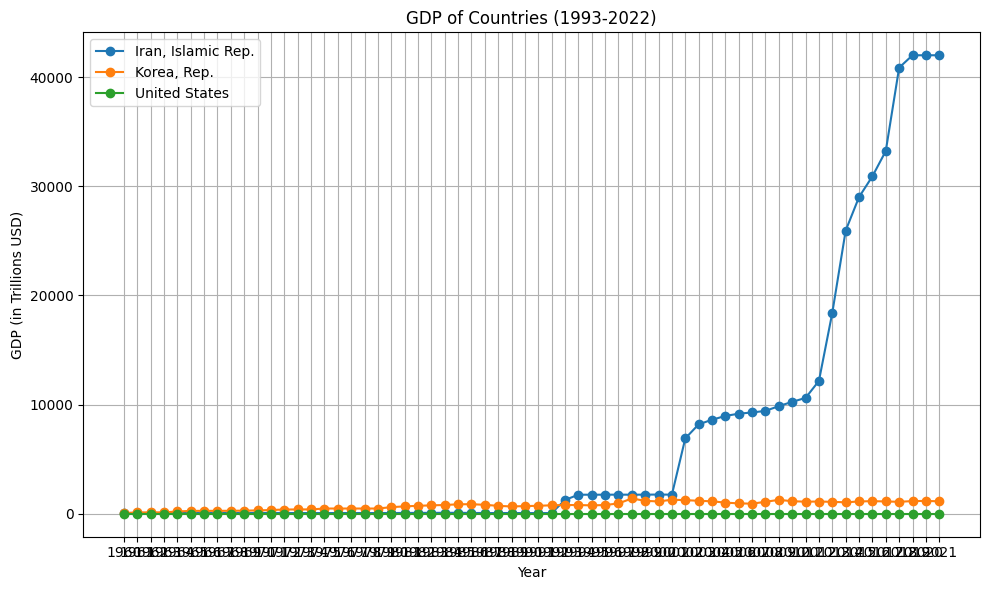

In [23]:
import matplotlib.pyplot as plt

# 그래프 설정
plt.figure(figsize=(10, 6))

# 각 나라별 EXCHANGE RATE 그래프 그리기
for country in countries_drop.index:
    plt.plot(countries_drop.columns, countries_drop.loc[country], marker='o', label=country)

# 그래프 제목 및 축 레이블 설정
plt.title('EXCHANGE RATE of Countries (1993-2021)')
plt.xlabel('Year')
plt.ylabel('EXCHANGE RATE')

# 범례 표시
plt.legend()

# 그래프 표시
plt.grid(True)
plt.tight_layout()
plt.show()


In [24]:
# 각 나라별로 연도별 GDP의 평균, 표준 편차, 최소값, 최대값 등을 계산
summary_statistics = countries_drop.describe()
summary_statistics

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
count,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
mean,46.625000,67.180556,68.916667,68.916667,96.865556,114.340000,115.961389,115.753889,117.797778,121.663889,...,4434.451296,6503.476837,8998.501380,10047.814627,10692.206647,11452.766328,13988.497448,14388.785833,14393.755278,14381.650556
std,40.013474,62.339159,64.770910,64.770910,107.982989,136.780606,139.484171,139.137946,142.551126,149.023514,...,6727.576439,10329.696276,14682.631409,16432.740951,17522.922625,18864.894420,23281.640441,23919.098915,23914.979150,23925.018373
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,32.062500,38.375000,38.375000,38.375000,38.375000,38.375000,38.375000,38.375000,38.375000,38.375000,...,563.903334,547.991250,526.920000,565.976250,580.883750,566.000417,550.581666,583.178750,590.632916,572.475834
50%,63.125000,75.750000,75.750000,75.750000,75.750000,75.750000,75.750000,75.750000,75.750000,75.750000,...,1126.806667,1094.982500,1052.840000,1130.952500,1160.767500,1131.000833,1100.163333,1165.357500,1180.265833,1143.951667
75%,69.437500,100.270833,102.875000,102.875000,144.798333,171.010000,173.442083,173.130833,176.196667,181.995833,...,6651.176944,9754.715255,13497.252070,15071.221940,16037.809970,17178.649492,20982.246171,21582.678750,21590.132916,21571.975834
max,75.750000,124.791667,130.000000,130.000000,213.846667,266.270000,271.134167,270.511667,276.643333,288.241667,...,12175.547220,18414.448010,25941.664140,29011.491380,30914.852440,33226.298150,40864.329010,42000.000000,42000.000000,42000.000000


In [25]:
!pip install seaborn

In [26]:
import seaborn as sns

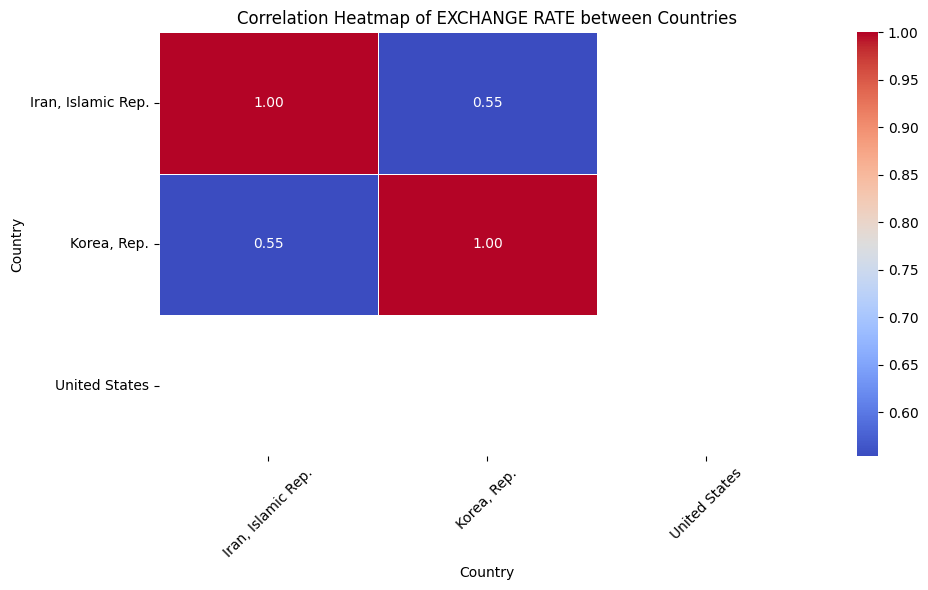

In [28]:
# 데이터 전치
df_transposed = countries_drop.transpose()

# 상관관계 계산
correlation_matrix = df_transposed.corr()

# 히트맵 그래프로 상관관계 시각화
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of EXCHANGE RATE between Countries')
plt.xlabel('Country')
plt.ylabel('Country')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

결론: 우리나라와 이란의 상관관계 soso -> 한국과 미국 GDP 모두 변수 후보에서 탈락

# 그래? 그럼 세계 모든 국가의 GDP와 이란 GDP간의 상관관계는?

In [29]:
world_exrate

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Aruba,ABW,"Official exchange rate (LCU per US$, period av...",PA.NUS.FCRF,NaN,NaN,NaN,NaN,NaN,NaN,...,1.790000,1.790000,1.790000,1.790000,1.790000,1.790000,1.790000,1.790000,1.790000,NaN
1,Africa Eastern and Southern,AFE,"Official exchange rate (LCU per US$, period av...",PA.NUS.FCRF,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,"Official exchange rate (LCU per US$, period av...",PA.NUS.FCRF,1.719656e+01,1.719656e+01,1.719656e+01,3.510964e+01,3.869226e+01,3.869226e+01,...,57.247500,61.143462,67.866086,68.026904,72.083247,77.737949,76.813536,NaN,NaN,NaN
3,Africa Western and Central,AFW,"Official exchange rate (LCU per US$, period av...",PA.NUS.FCRF,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Angola,AGO,"Official exchange rate (LCU per US$, period av...",PA.NUS.FCRF,2.870000e-08,2.870000e-08,2.870000e-08,2.880000e-08,2.880000e-08,2.880000e-08,...,98.302417,120.060702,163.656434,165.915951,252.855748,364.825805,578.258780,631.441955,460.567512,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,"Official exchange rate (LCU per US$, period av...",PA.NUS.FCRF,NaN,NaN,NaN,NaN,NaN,NaN,...,0.752728,0.901296,0.903421,0.885206,0.846773,0.893216,0.877475,0.845377,0.950916,NaN
262,"Yemen, Rep.",YEM,"Official exchange rate (LCU per US$, period av...",PA.NUS.FCRF,NaN,NaN,NaN,NaN,NaN,NaN,...,214.890000,230.833333,283.895833,282.195000,214.890000,486.730923,743.005964,1035.467186,1114.292841,NaN
263,South Africa,ZAF,"Official exchange rate (LCU per US$, period av...",PA.NUS.FCRF,7.142860e-01,7.142860e-01,7.142860e-01,7.142860e-01,7.142860e-01,7.142860e-01,...,10.852656,12.758931,14.709611,13.323801,13.233926,14.448427,16.459105,14.778678,16.355853,NaN
264,Zambia,ZMB,"Official exchange rate (LCU per US$, period av...",PA.NUS.FCRF,7.142860e-01,7.142860e-01,7.142860e-01,7.142860e-01,7.142860e-01,7.142860e-01,...,6.154167,8.631667,10.307500,9.517500,10.458333,12.890000,18.344093,20.018487,16.937594,NaN


In [31]:
world_exrate_drop = world_exrate.drop(['Country Code', 'Indicator Name', 'Indicator Code','2022', '2023'], axis=1)

# 'Country Name' 열을 인덱스로 설정
world_exrate_drop.set_index('Country Name', inplace=True)


In [32]:
world_exrate_drop

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
Country Name,,,,,,,,,,,,,,,,,,,,,
Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.790000,1.790000,1.790000,1.790000,1.790000,1.790000,1.790000,1.790000,1.790000,1.790000
Africa Eastern and Southern,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Afghanistan,1.719656e+01,1.719656e+01,1.719656e+01,3.510964e+01,3.869226e+01,3.869226e+01,3.869226e+01,3.869226e+01,3.869226e+01,3.869226e+01,...,50.921400,55.377500,57.247500,61.143462,67.866086,68.026904,72.083247,77.737949,76.813536,NaN
Africa Western and Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Angola,2.870000e-08,2.870000e-08,2.870000e-08,2.880000e-08,2.880000e-08,2.880000e-08,2.880000e-08,2.880000e-08,2.870000e-08,2.860000e-08,...,95.467955,96.518279,98.302417,120.060702,163.656434,165.915951,252.855748,364.825805,578.258780,631.441955
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Kosovo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.778338,0.752945,0.752728,0.901296,0.903421,0.885206,0.846773,0.893216,0.877475,0.845377
"Yemen, Rep.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,214.349167,214.890000,214.890000,230.833333,283.895833,282.195000,214.890000,486.730923,743.005964,1035.467186
South Africa,7.142860e-01,7.142860e-01,7.142860e-01,7.142860e-01,7.142860e-01,7.142860e-01,7.142860e-01,7.142860e-01,7.142860e-01,7.142860e-01,...,8.209969,9.655056,10.852656,12.758931,14.709611,13.323801,13.233926,14.448427,16.459105,14.778678


In [34]:
# 데이터 전치
df_world_transposed = world_exrate_drop.transpose()

In [35]:
# 상관관계 계산
correlation_matrix = df_world_transposed.corr()

# 상관관계가 0.6 이상이거나 -0.6 이하인 경우만 필터링
filtered_correlation = correlation_matrix[
    (correlation_matrix >= 0.7) | (correlation_matrix <= -0.7)
]

In [36]:
# 중복된 데이터를 제거하기 위해 상삼각행렬로 변환
filtered_correlation = filtered_correlation.where(np.triu(np.ones(filtered_correlation.shape), k=1).astype(np.bool))
filtered_correlation

c:\Users\LG\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


Country Name,Aruba,Africa Eastern and Southern,Afghanistan,Africa Western and Central,Angola,Albania,Andorra,Arab World,United Arab Emirates,Argentina,...,Virgin Islands (U.S.),Viet Nam,Vanuatu,World,Samoa,Kosovo,"Yemen, Rep.",South Africa,Zambia,Zimbabwe
Country Name,,,,,,,,,,,,,,,,,,,,,
Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Africa Eastern and Southern,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Afghanistan,NaN,NaN,NaN,NaN,0.805615,NaN,NaN,NaN,NaN,0.812463,...,NaN,0.787837,NaN,NaN,NaN,NaN,0.850071,0.900053,0.877601,NaN
Africa Western and Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.973998,...,NaN,NaN,NaN,NaN,NaN,NaN,0.955154,0.785642,0.957861,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Kosovo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Yemen, Rep.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.773448,0.935966,NaN
South Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.912773,NaN


In [37]:
# 'Iran, Islamic Rep.'와 다른 나라들 간의 상관관계만 선택
iran_correlation = filtered_correlation.loc['Iran, Islamic Rep.', :]

# 결과 출력
print(iran_correlation)


Country Name
Aruba                               NaN
Africa Eastern and Southern         NaN
Afghanistan                         NaN
Africa Western and Central          NaN
Angola                              NaN
                                 ...   
Kosovo                              NaN
Yemen, Rep.                    0.771851
South Africa                   0.907559
Zambia                         0.950244
Zimbabwe                            NaN
Name: Iran, Islamic Rep., Length: 266, dtype: float64


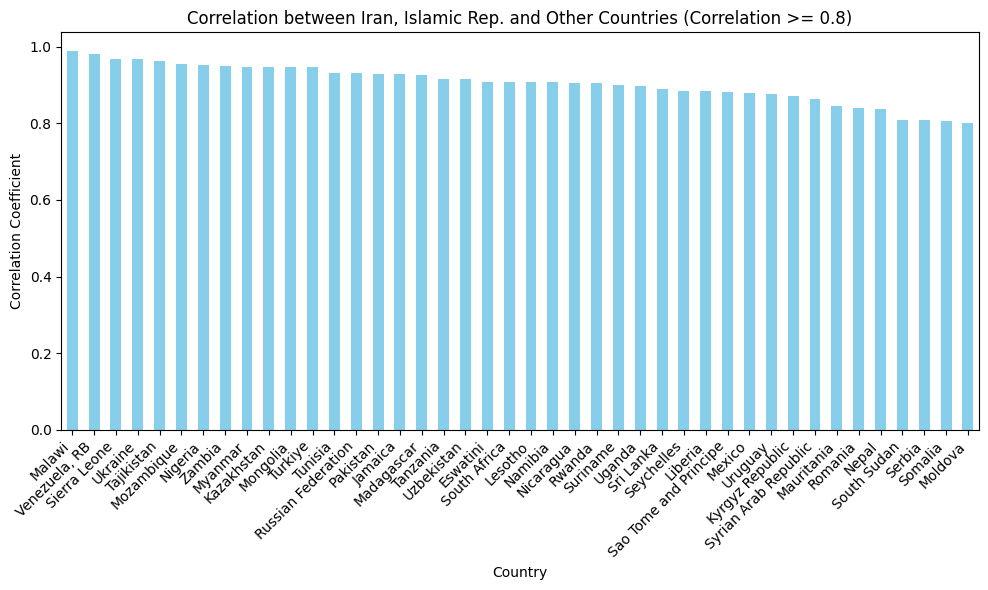

In [38]:
# NaN 값을 제거하여 새로운 Series 생성
iran_correlation_cleaned = iran_correlation.dropna()

# 상관관계가 0.8 이상인 국가들 선택
iran_correlation_cleaned_filtered = iran_correlation_cleaned[iran_correlation_cleaned >= 0.8]

# 상관관계가 높은 순으로 정렬
iran_correlation_cleaned_filtered_sorted = iran_correlation_cleaned_filtered.sort_values(ascending=False)

# 'Iran, Islamic Rep.'와 상관관계가 0.8 이상인 국가들만 시각화
plt.figure(figsize=(10, 6))
iran_correlation_cleaned_filtered_sorted.plot(kind='bar', color='skyblue')
plt.title("Correlation between Iran, Islamic Rep. and Other Countries (Correlation >= 0.8)")
plt.xlabel("Country")
plt.ylabel("Correlation Coefficient")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


결론: 낮은 상관관계로 한국과 미국의 수치는 반영할 수 없게 됨. 말라위랑 베네수엘라, 시리아 우쿠라이나, 타지키스탄

# 이란 환율 변동기만 크게 함 봐볼까?

In [39]:
countries = world_exrate[world_exrate['Country Name'].isin(["Iran, Islamic Rep."])]
countries

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
112,"Iran, Islamic Rep.",IRN,"Official exchange rate (LCU per US$, period av...",PA.NUS.FCRF,75.75,75.75,75.75,75.75,75.75,75.75,...,25941.66414,29011.49138,30914.85244,33226.29815,40864.32901,42000.0,42000.0,42000.0,NaN,NaN


In [40]:
# '2022', '2023'데이터 열 모두 삭제
countries_drop = countries.drop(['Country Code', 'Indicator Name', 'Indicator Code', '2022', '2023'], axis=1)

countries_drop = countries_drop.reset_index(drop=True)
countries_drop

,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,"Iran, Islamic Rep.",75.75,75.75,75.75,75.75,75.75,75.75,75.75,75.75,75.75,...,12175.54722,18414.44801,25941.66414,29011.49138,30914.85244,33226.29815,40864.32901,42000.0,42000.0,42000.0


In [41]:
# 'Country Name' 열을 인덱스로 설정
countries_drop.set_index('Country Name', inplace=True)

countries_drop

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
Country Name,,,,,,,,,,,,,,,,,,,,,
"Iran, Islamic Rep.",75.75,75.75,75.75,75.75,75.75,75.75,75.75,75.75,75.75,75.75,...,12175.54722,18414.44801,25941.66414,29011.49138,30914.85244,33226.29815,40864.32901,42000.0,42000.0,42000.0


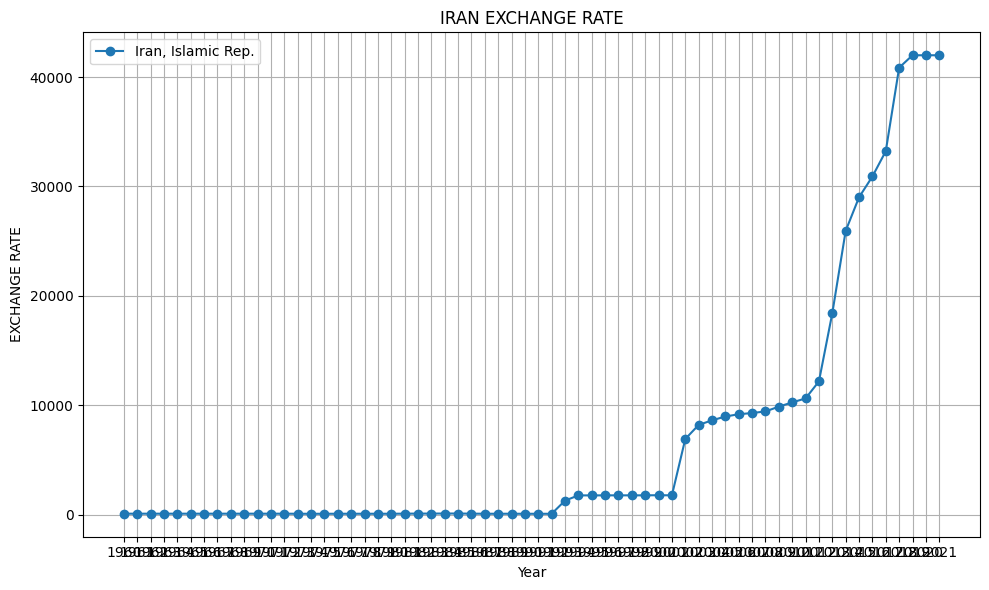

In [42]:
# 그래프 설정
plt.figure(figsize=(10, 6))

# 이란 그래프 그리기
for country in countries_drop.index:
    plt.plot(countries_drop.columns, countries_drop.loc[country], marker='o', label=country)

# 그래프 제목 및 축 레이블 설정
plt.title('IRAN EXCHANGE RATE')
plt.xlabel('Year')
plt.ylabel('EXCHANGE RATE')

# 범례 표시
plt.legend()

# 그래프 표시
plt.grid(True)
plt.tight_layout()
plt.show()

In [47]:
# 데이터 열 조정
countries_drop = countries.drop(['Country Code', 'Indicator Name', 'Indicator Code', '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
    '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
    '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
    '1987', '1988', '1989', '1990', '1991'], axis=1)

countries_drop

,Country Name,1992,1993,1994,1995,1996,1997,1998,1999,2000,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
112,"Iran, Islamic Rep.",65.567841,1268.078761,1749.173736,1748.350246,1751.186356,1753.345477,1752.285995,1753.35495,1764.856069,...,25941.66414,29011.49138,30914.85244,33226.29815,40864.32901,42000.0,42000.0,42000.0,NaN,NaN


In [48]:
# 'Country Name' 열을 인덱스로 설정
countries_drop.set_index('Country Name', inplace=True)

countries_drop

,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
Country Name,,,,,,,,,,,,,,,,,,,,,
"Iran, Islamic Rep.",65.567841,1268.078761,1749.173736,1748.350246,1751.186356,1753.345477,1752.285995,1753.35495,1764.856069,1753.985685,...,25941.66414,29011.49138,30914.85244,33226.29815,40864.32901,42000.0,42000.0,42000.0,NaN,NaN


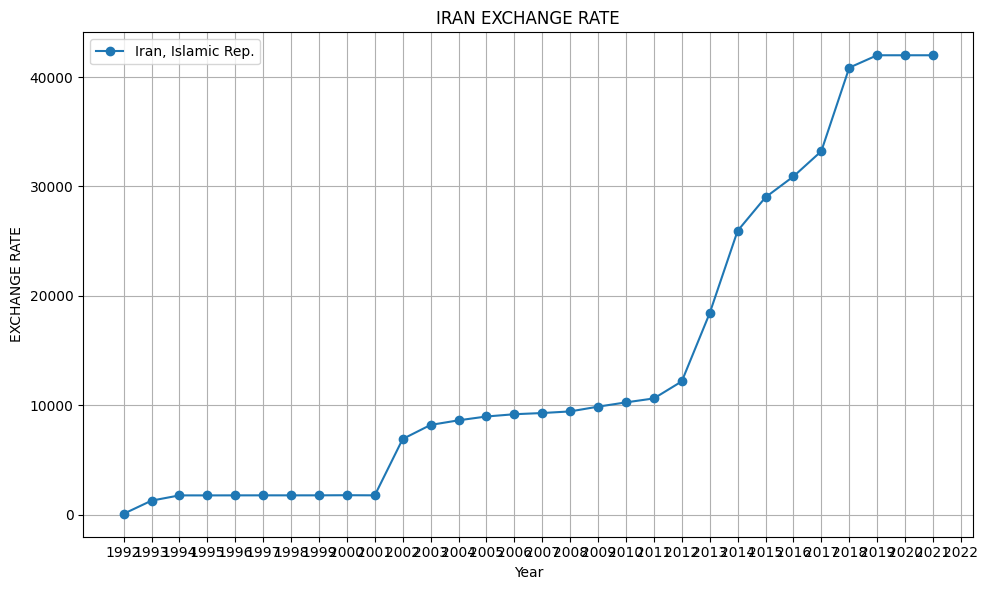

In [49]:
# 그래프 설정
plt.figure(figsize=(10, 6))

# 이란 그래프 그리기
for country in countries_drop.index:
    plt.plot(countries_drop.columns, countries_drop.loc[country], marker='o', label=country)

# 그래프 제목 및 축 레이블 설정
plt.title('IRAN EXCHANGE RATE')
plt.xlabel('Year')
plt.ylabel('EXCHANGE RATE')

# 범례 표시
plt.legend()

# 그래프 표시
plt.grid(True)
plt.tight_layout()
plt.show()